In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

from knn import meanDistance, knnCandidates, euclidean



In [2]:

def expected_polynominal(x):
    return 5 + (12 * x) - (x ** 2) + 0.025 * (x ** 3)


def mean_square_error(x):
    n = len(x)
    est = sum([pow(y_i - expected_polynominal(y_i), 2.0) for y_i in x])
    return (1.0 / n) * est


In [3]:


style.use('fast')
kTestSet = [1, 3, 5, 7]
distanceFunc = euclidean

df = pd.read_csv("polynomial200.csv")

# Extract label and data points.
X = np.array(df.drop(['y'], 1))
y = np.array(df['y'])

# Train Data.
half = int(len(X) / 2)
trainX = X[0:half]
trainY = y[0:half]

# Test Data.
testX = X[half:]
testY = y[half:]


/tmp/ipykernel_216769/2585587175.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['y'], 1))


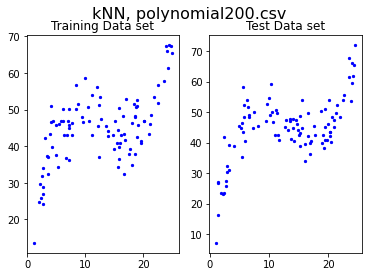

In [4]:

# Create two figures for training and test data points.
f, trainTestPlots = plt.subplots(1, 2)
plt.suptitle("kNN, polynomial200.csv", fontsize=16)

# Plot train data.
xplot = trainTestPlots[0]
xplot.scatter(trainX, trainY, s=5, color='b')
xplot.set_title("Training Data set")

# Plot test data.
xplot = trainTestPlots[1]
xplot.scatter(testX, testY, s=5, color='b')
xplot.set_title("Test Data set")

# Display the training and test data!
plt.show()

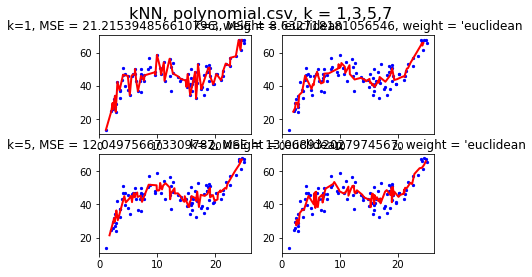

In [5]:
#
f, trainTestPlots = plt.subplots(2, 2)
plt.suptitle("kNN, polynomial.csv, k = 1,3,5,7", fontsize=16)
for i, k in enumerate(kTestSet):
    plot = trainTestPlots[0 + int(i / 2)][i % 2]
    plot.scatter(trainX, trainY, s=5, color='b')

    earr = []
    lineX = []
    lineY = []
    j = 0

    for tX, tY in zip(testX, testY):
        # Get a list of all k candidates Y.
        xs = knnCandidates(trainX, trainY, tX[0], k, distanceFunc)

        # Compute mean distance between the k candidates.
        p = meanDistance([tX[0], tY], xs)

        # Add point to line list .
        lineX.append([j, p[0]])
        lineY.append(p[1])

        # Compute the different squared from
        # The computed mean distance point and the
        # the real polynomial function.
        ei = (expected_polynominal(tX[0]) - p[1]) ** 2
        earr.append(ei)

        j = j + 1

    # Sorted by x value.
    lineX = sorted(lineX, key=itemgetter(1))
    # Get respective y value by ascended x's y index.
    lineY = [lineY[x[0]] for x in lineX]
    # Extract the x values.
    lineX = [x[1] for x in lineX]

    # Draw the line.
    plot.plot(lineX, lineY, color='r', linewidth=2.0)

    # Compute least square error.
    mse = sum(earr)
    mse = mse * 1.0 / len(earr)

    # Display title result.
    plot.set_title("k={}, MSE = {}, weight = '{}".format(k, mse, distanceFunc.__name__))

plt.show()